
# **EVALUACIÓN FINAL: ANÁLISIS DEL IMPACTO DEL CAMBIO CLIMÁTICO EN LA PRODUCCIÓN AGRÍCOLA**

Eres un analista de datos en un centro de investigación sobre cambio climático y seguridad alimentaria. Te han encomendado evaluar cómo factores climáticos afectan la producción agrícola en distintos países. Para ello, aplicarás modelos de aprendizaje supervisado para predecir la producción de alimentos y clasificar los países según su vulnerabilidad.

# **OBJETIVOS DE LA EVALUACIÓN**

* Aplicar técnicas de regresión para predecir la producción agrícola en función de variables
climáticas.

* Utilizar algoritmos de clasificación para categorizar los países según el impacto del cambio climático.
* Evaluar el desempeño de los modelos mediante métricas adecuadas.
* Aplicar preprocesamiento de datos para mejorar la calidad del análisis.
* Optimizar los modelos a través de técnicas de ajuste de hiperparámetros.

# **INSTRUCCIONES**

1.  **Carga y exploración de datos (1 punto)**

* Carga el dataset proporcionado, que contiene información sobre temperatura media, cambio en las precipitaciones, frecuencia de sequías y producción agrícola en distintos países.
* Analiza la distribución de las variables y detecta posibles valores atípicos o tendencias.

2. **Preprocesamiento y escalamiento de datos (2 puntos)**
* Aplica técnicas de normalización o estandarización a las variables numéricas.
* Codifica correctamente cualquier variable categórica si fuera necesario.
 * Divide los datos en conjunto de  entrenamiento y prueba (80%-20%).
3. **Aplicación de modelos de aprendizaje supervisado (4 puntos)**
* Regresión:
 * Entrena un modelo de regresión lineal para predecir la producción de
alimentos.

 * Evalúa el modelo usando métricas como MAE, MSE y R2.
 * Compara con otros modelos de regresión (árbol de decisión, random forest).
* Clasificación:
 * Crea una nueva variable categórica que clasifique los países en "Bajo",
"Medio" y "Alto" impacto climático en la producción agrícola.
 * Entrena modelos de clasificación como K-Nearest Neighbors, Árbol de Decisión y Support Vector Machine.
 * Evalúa el desempeño usando matriz de confusión, precisión, sensibilidad y curva ROC-AUC.

4. **Optimización de modelos (2 puntos)**
* Ajusta hiperparámetros utilizando validación cruzada y búsqueda en grilla.
* Aplica técnicas de regularización y analiza su impacto en los modelos.

5. **Análisis de resultados y conclusiones (1 punto)**
* Compara los modelos utilizados y justifica cuál ofrece mejores resultados para la predicción y clasificación.
* Relaciona los hallazgos con posibles implicaciones en la seguridad alimentaria global.

In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, ShuffleSplit, LeaveOneOut, GridSearchCV, validation_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, classification_report,
    ConfusionMatrixDisplay, confusion_matrix, roc_curve
)
import warnings
warnings.filterwarnings("ignore")



In [ ]:
# ==============================
# 1. CARGA DE LOS DATOS
# ==============================

files.upload()
archivo_csv = 'cambio_climatico_agricultura.csv'

#leer archivo .csv
with open(archivo_csv, 'r', encoding='utf-8') as f:
    sample = f.read(2048)
    dialect = csv.Sniffer().sniff(sample)

df = pd.read_csv(archivo_csv, sep=dialect.delimiter)

df

Saving cambio_climatico_agricultura.csv to cambio_climatico_agricultura.csv


,País,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos
0,Alemania,10.5,-5,2,950000
1,Argentina,17.8,-10,5,650000
2,Australia,22.3,-15,8,400000
3,Brasil,25.1,-8,6,900000
4,Canadá,6.2,-2,1,850000
5,Chile,15.4,-12,7,500000
6,España,18.2,-9,6,600000
7,Estados Unidos,12.8,-4,3,1200000
8,Francia,11.5,-6,2,980000
9,Italia,13.4,-7,4,700000


        País  Temperatura_promedio  Cambio_lluvias  Frecuencia_sequías  \
0   Alemania                  10.5              -5                   2   
1  Argentina                  17.8             -10                   5   
2  Australia                  22.3             -15                   8   
3     Brasil                  25.1              -8                   6   
4     Canadá                   6.2              -2                   1   

   Producción_alimentos  
0                950000  
1                650000  
2                400000  
3                900000  
4                850000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   País                  23 non-null     object 
 1   Temperatura_promedio  23 non-null     float64
 2   Cambio_lluvias        23 non-null     int64  
 3   Frecuencia_sequías    23 non-null    

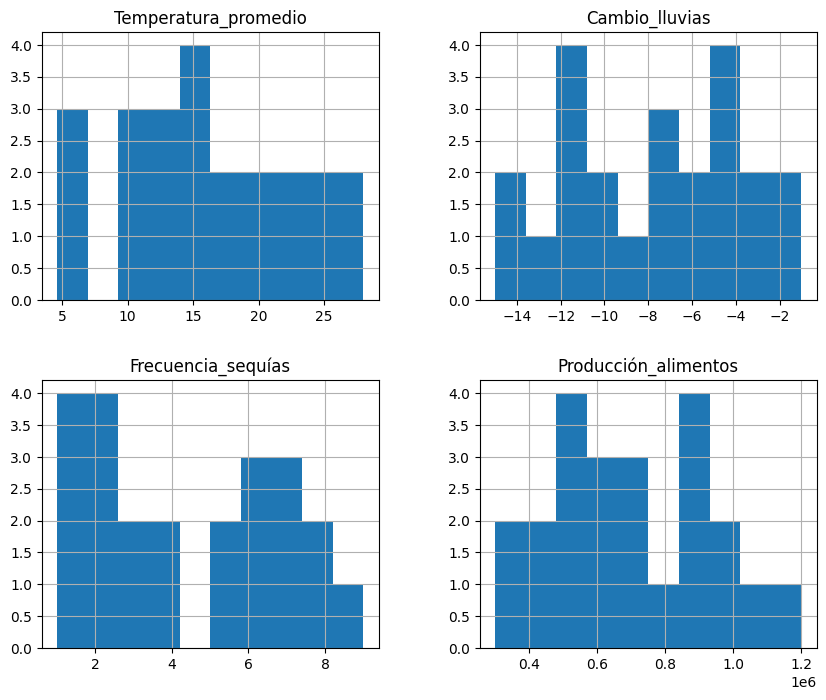

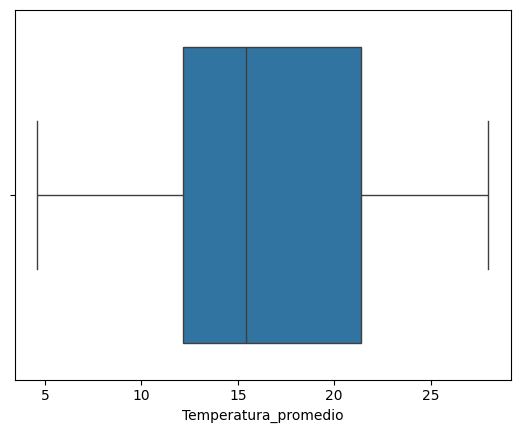

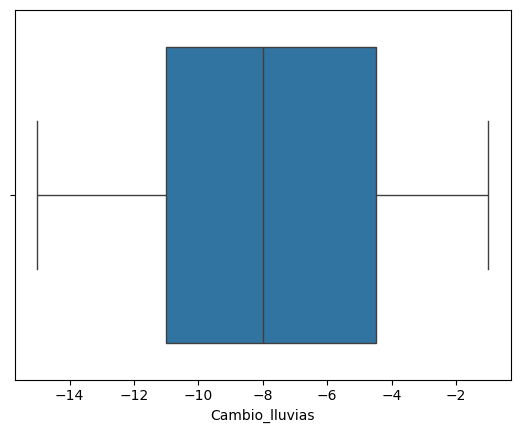

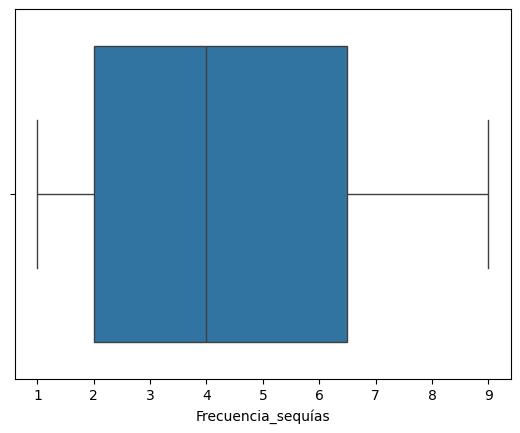

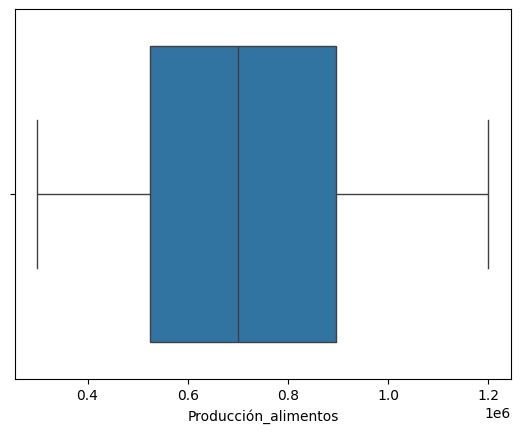

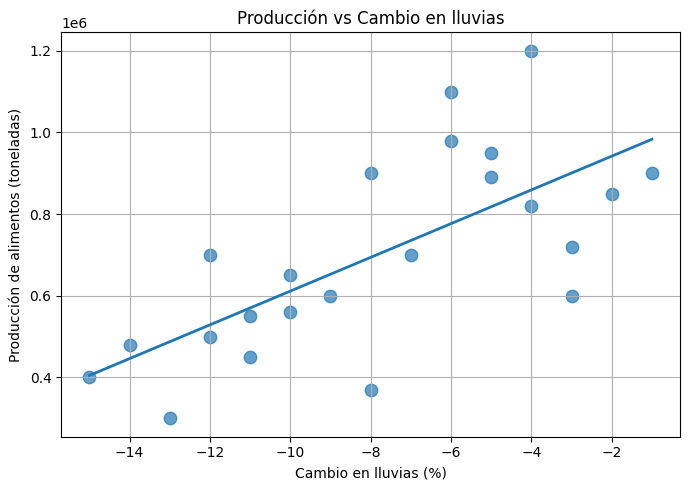

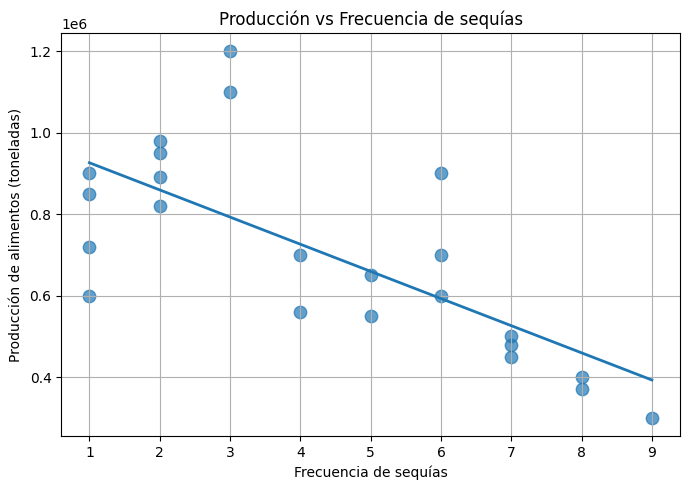

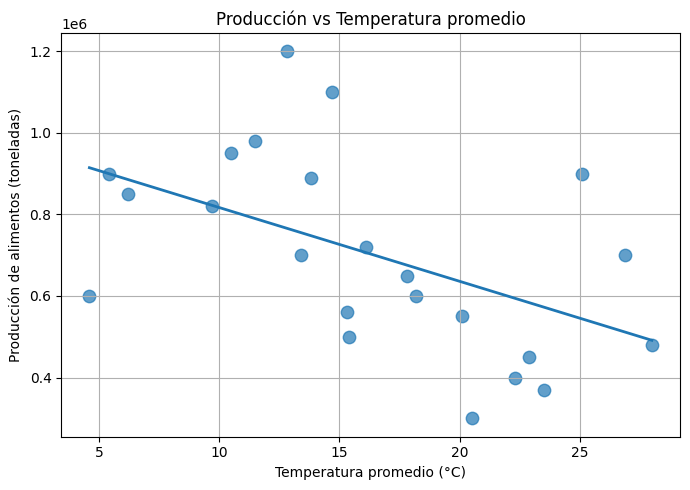

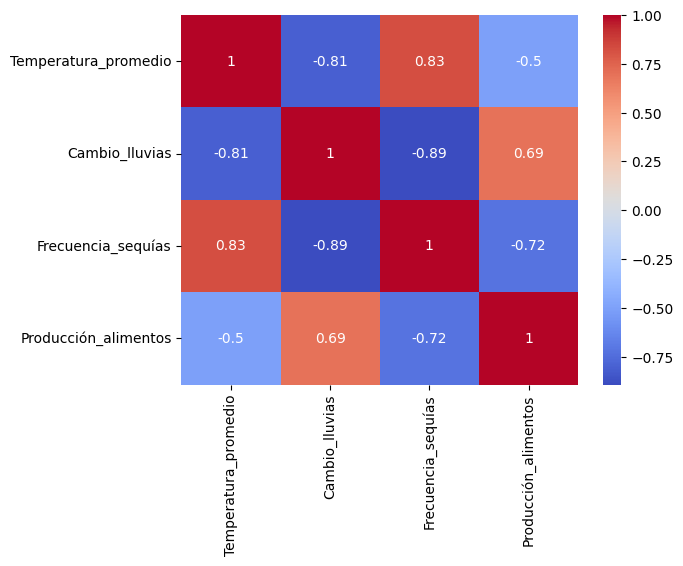

In [ ]:
# ==============================
# 1.1 VISUALIZACION DE LOS DATOS
# ==============================

# Exploración básica
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())
print("\n")

# Distribución de variables numéricas
numeric_cols = ['Temperatura_promedio', 'Cambio_lluvias', 'Frecuencia_sequías', 'Producción_alimentos']
df[numeric_cols].hist(bins=10, figsize=(10,8))
plt.show()
print("\n")

# Boxplots para detectar outliers
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.show()

# --- Función auxiliar para scatter + línea de tendencia ---
def scatter_con_tendencia(x, y, xlabel, ylabel, titulo):
    plt.figure(figsize=(7,5))
    plt.scatter(x, y, s=80, alpha=0.7)  # sin colores específicos
    # Línea de tendencia (polinomio grado 1)
    coef = np.polyfit(x, y, 1)
    p = np.poly1d(coef)
    xs = np.linspace(min(x), max(x), 100)
    plt.plot(xs, p(xs), linewidth=2)     # sin colores específicos
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n")

# 2) Gráfico: Producción vs Cambio en lluvias
scatter_con_tendencia(
    df["Cambio_lluvias"],
    df["Producción_alimentos"],
    "Cambio en lluvias (%)",
    "Producción de alimentos (toneladas)",
    "Producción vs Cambio en lluvias"
)

# 3) Gráfico: Producción vs Frecuencia de sequías
scatter_con_tendencia(
    df["Frecuencia_sequías"],
    df["Producción_alimentos"],
    "Frecuencia de sequías",
    "Producción de alimentos (toneladas)",
    "Producción vs Frecuencia de sequías"
)

# 4) Gráfico: Producción vs Temperatura promedio
scatter_con_tendencia(
    df["Temperatura_promedio"],
    df["Producción_alimentos"],
    "Temperatura promedio (°C)",
    "Producción de alimentos (toneladas)",
    "Producción vs Temperatura promedio"
)

print("\n")

# Correlaciones
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()





# **1.2 Análisis de Datos:**
Los diagramas de cajas muestran que ninguna variable tiene outliers visibles. La matriz de correlacion muestra que la Frecuencia de Sequias muestra la correlacion (negativa) más importante, esto quiere decir que con mayor frecuencia de sequias la produccion tiende a bajar. La correlacion positiva de cambio de lluvias es la siguiente variable importante (positiva) y nos indica que a mayor cambio de lluvias, la produccion tiende al alza. Esto se ve tambien claramente en los Graficos Scatter.


In [ ]:
# ============================================================
# 2. PREPROCESAMIENTO Y ESCALAMIENTO DE LOS DATOS
# ============================================================

# Dividir variables
X = df.drop('Producción_alimentos', axis=1)
y = df['Producción_alimentos']

# Identificar tipos de variables
categorical_features = ['País']
numerical_features = ['Temperatura_promedio', 'Cambio_lluvias', 'Frecuencia_sequías']


# Aplicar Min-Max Scaling
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df[numerical_features])


# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# ===============================================
# 3.1 APLICACIÓN DE MODELOS - REGRESION
# ===============================================

# Diccionario para resultados
results = {}
results_mse = {}

# Regresión Lineal
lin_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


print(f"--- MÉTRICAS ---\n\n")

print(f"VaLores para Regresión Lineal:\n")


lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
results['Regresión Lineal'] = mse_lin
results['Regresión Lineal_mae'] = mae_lin
results_mse['Regresión Lineal'] = mse_lin
results['Regresión Lineal_r2'] = r2_lin
print(f"MSE Regresión Lineal: {mse_lin:,.2f}")
print(f"MAE Regresión Lineal: {mae_lin:,.2f}")
print(f"R2 Regresión Lineal: {r2_lin:,.2f}")

# Regresión Polinómica (Grado 2)
poly_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\n\n")
print(f"VaLores para Regresión Polinómica:\n")


results['Regresión Polinómica'] = mse_poly
results['Regresión Polinómica_mae'] = mae_poly
results_mse['Regresión Polinómica'] = mse_poly
results['Regresión Polinómica_r2'] = r2_poly
print(f"MSE Regresión Polinómica: {mse_poly:,.2f}")
print(f"MAE Regresión Polinómica: {mae_poly:,.2f}")
print(f"R2 Regresión Polinómica: {r2_poly:,.2f}")

# Árbol de Decisión
tree_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42, max_depth=5))
])
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"\n\n")
print(f"VaLores para Árbol de Decisión:\n")


results['Árbol de Decisión'] = mse_tree
results['Árbol de Decisión_mae'] = mae_tree
results_mse['Árbol de Decisión'] = mse_tree
results['Árbol de Decisión_r2'] = r2_tree
print(f"MSE Árbol de Decisión: {mse_tree:,.2f}")
print(f"MAE Árbol de Decisión: {mae_tree:,.2f}")
print(f"R2 Árbol de Decisión: {r2_tree:,.2f}")

print(f"\n\n")

--- MÉTRICAS ---


VaLores para Regresión Lineal:

MSE Regresión Lineal: 44,005,458,804.92
MAE Regresión Lineal: 178,682.69
R2 Regresión Lineal: -0.27



VaLores para Regresión Polinómica:

MSE Regresión Polinómica: 38,424,555,091.99
MAE Regresión Polinómica: 176,156.31
R2 Regresión Polinómica: -0.11



VaLores para Árbol de Decisión:

MSE Árbol de Decisión: 34,985,000,000.00
MAE Árbol de Decisión: 169,000.00
R2 Árbol de Decisión: -0.01





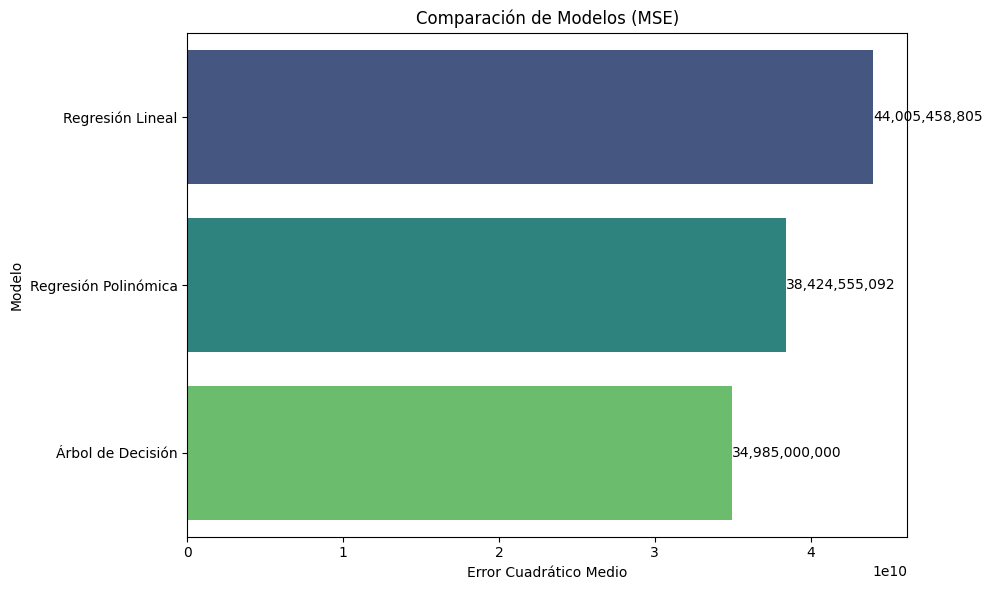

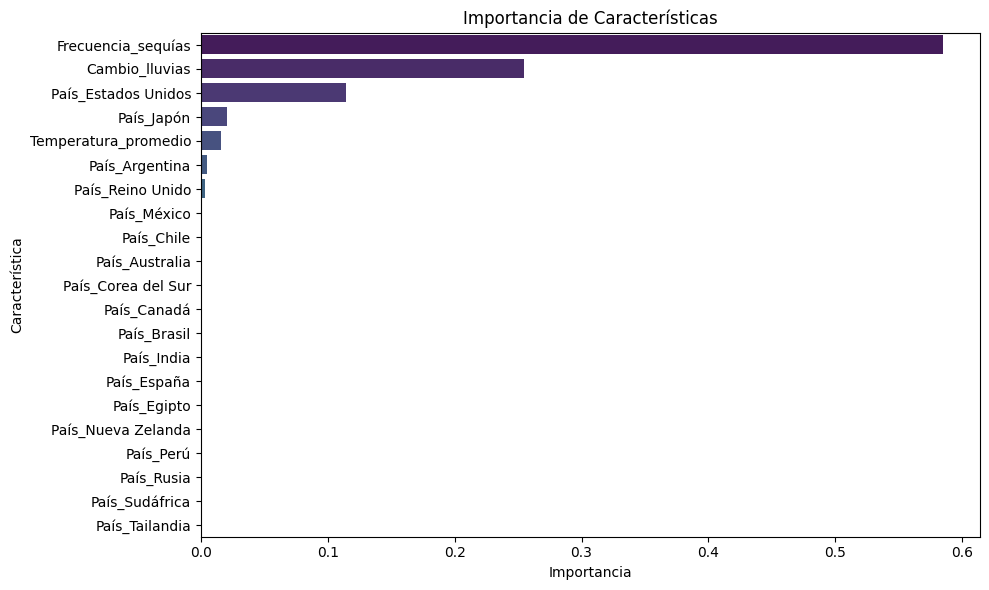

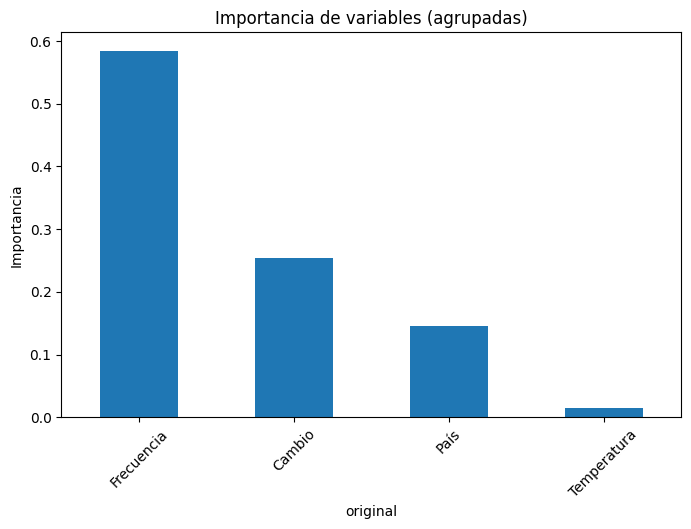

In [ ]:
# ==========================================================
# 3.1 APLICACION DE MODELOS - COMPARACIÓN Y CONCLUSIONES
# ==========================================================

# Comparación de modelos
results_df = pd.DataFrame({'Modelo': list(results_mse.keys()), 'MSE': list(results_mse.values())})
best_model = results_df.loc[results_df['MSE'].idxmin(), 'Modelo']

# Visualización comparativa
plt.figure(figsize=(10, 6))
sns.barplot(x='MSE', y='Modelo', data=results_df, hue='Modelo', palette='viridis', legend=False)
plt.title('Comparación de Modelos (MSE)')
plt.xlabel('Error Cuadrático Medio')
for i, v in enumerate(results_df['MSE']):
    plt.text(v + 5000, i, f'{v:,.0f}', va='center')
plt.tight_layout()
plt.savefig('comparacion_mse.png', dpi=150, bbox_inches='tight')
plt.show()

# Análisis de características (solo para árbol de decisión)
preprocessor.fit(X_train)
feature_names = numerical_features + list(
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
)
importances = tree_reg.named_steps['regressor'].feature_importances_
importance_df = pd.DataFrame({'Característica': feature_names, 'Importancia': importances}).sort_values('Importancia', ascending=False)

print("\n")

# Visualización de importancia (CORRECCIÓN DE WARNING)
plt.figure(figsize=(10, 6))
# CORRECCIÓN: Se añade hue y legend=False
sns.barplot(x='Importancia', y='Característica', data=importance_df,
            hue='Característica', palette='viridis', legend=False)
plt.title('Importancia de Características')
plt.tight_layout()
plt.show()

print("\n")
# ==========================
# Importancia de características (agrupadas)
# ==========================

# 1. Nombres de las columnas después del preprocesamiento
feature_names = preprocessor.get_feature_names_out()

# 2. Importancias del árbol
importances = tree_reg.named_steps['regressor'].feature_importances_

# 3. DataFrame con resultados
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
})

# 4. Extraer nombre original (País en lugar de País_Alemania, etc.)
feat_imp["original"] = feat_imp["feature"].str.replace("num__","").str.replace("cat__","")
feat_imp["original"] = feat_imp["original"].str.split("_").str[0]

# 5. Agrupar por variable original
grouped = feat_imp.groupby("original")["importance"].sum().sort_values(ascending=False)

# 6. Graficar
plt.figure(figsize=(8,5))
grouped.plot(kind="bar")
plt.title("Importancia de variables (agrupadas)")
plt.ylabel("Importancia")
plt.xticks(rotation=45)
plt.show()



In [ ]:
# ==================================================
# 3.1. APLICACION DE MODELOS INFORME CONCLUSIONES
# ==================================================

# Generar informe conciso
with open('conclusiones.txt', 'w') as f:
    f.write("="*50 + "\n")
    f.write("INFORME DE PREDICCION DE PRODUCCIÓN DE ALIMENTOS\n")
    f.write("="*50 + "\n\n")

    f.write("\033[1mRESULTADOS:\033[0m\n")
    f.write(f"\033[4mRegresion Lineal\033[0m\n")
    f.write(f"-   MSE: {mse_lin:,.2f}\n")
    f.write(f"-   MAE: {mae_lin:,.2f}\n")
    f.write(f"-   R2: {r2_lin:,.2f}\n")
    f.write(f"\033[4mRegresion Polinómica\033[0m\n")
    f.write(f"-   MSE: {mse_poly:,.2f}\n")
    f.write(f"-   MAE: {mae_poly:,.2f}\n")
    f.write(f"-   R2: {r2_poly:,.2f}\n")
    f.write(f"\033[4mArbol de Decisión\033[0m\n")
    f.write(f"-   MSE: {mse_tree:,.2f}\n")
    f.write(f"-   MAE: {mae_tree:,.2f}\n")
    f.write(f"-   R2: {r2_tree:,.2f}\n")


    f.write(f"\033[1mMEJOR MODELO: {best_model}\033[0m\n")
    f.write(f"Con un MSE de {results[best_model]:,.2f} y un R2 de {results[best_model + '_r2']:,.2f}\n\n")

    f.write("CONCLUSIONES:\n")
    f.write("1. El Árbol de Decisión mostro el mejor desempeno, indicando\n")
    f.write("   que las relaciones entre variables no son lineales.\n")
    f.write("2. La frecuencia de las sequías es el factor mas\n")
    f.write("   determinante en la producción de alimentos, seguida por\n")
    f.write("   el cambio en las lluvias.\n")

print("\n¡Analisis completado exitosamente!")
print(f"El mejor modelo es: {best_model}")
print("Visualizaciones guardadas y conclusiones en 'conclusiones.txt'")


¡Analisis completado exitosamente!
El mejor modelo es: Árbol de Decisión
Visualizaciones guardadas y conclusiones en 'conclusiones.txt'


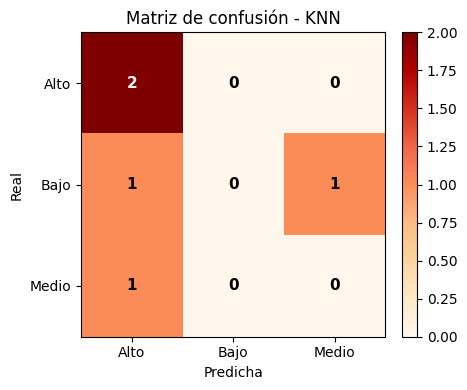

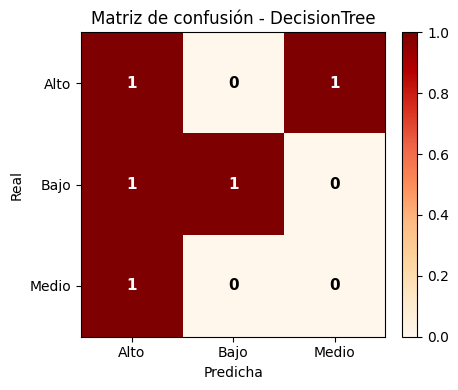

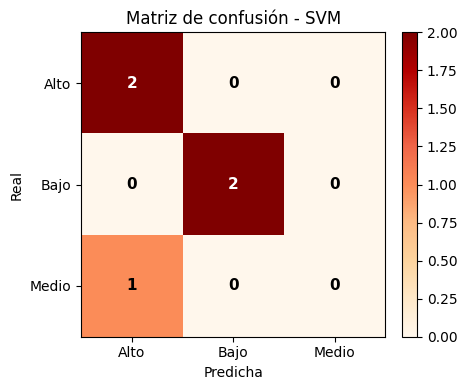

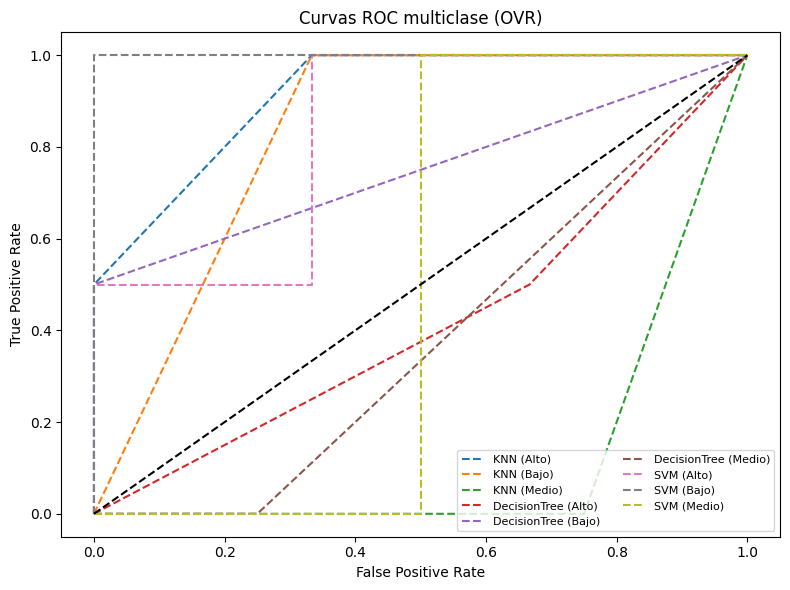


=== Resultados ===
              Accuracy  Precision_macro  Recall_macro  ROC_AUC_OVR
KNN             0.4000           0.1667        0.3333       0.6250
DecisionTree    0.4000           0.4444        0.3333       0.5139
SVM             0.8000           0.5556        0.6667       0.7778


In [13]:

# ===============================================
# 3.2 APLICACIÓN DE MODELOS - CLASIFICACION
# ===============================================
"""
1) Creación de variable categórica (Bajo/Medio/Alto) por terciles de Producción_alimentos
2) Entrenamiento de KNN, Árbol de Decisión y SVM
3) Evaluación con matriz de confusión, accuracy, precision (macro), recall (macro) y ROC-AUC (OVR)
4) Gráficos: matrices de confusión y curvas ROC multiclase

clasificacion
Alto → países con mayor producción
Medio → países en el rango intermedio
Bajo → países con menor producción
"""



# -------- Definición de Funciones --------
def crear_variable_impacto(df: pd.DataFrame, col_prod: str = "Producción_alimentos") -> pd.DataFrame:
    #Crea la variable categórica 'Impacto' según terciles de Producción_alimentos.
    df = df.copy()
    df["Impacto"] = pd.qcut(df[col_prod], q=3, labels=["Bajo", "Medio", "Alto"])
    return df

def preparar_datos(df: pd.DataFrame):
    #Separa, codifica y escala
    X = df.drop(columns=["País", "Producción_alimentos", "Impacto"])
    y = df["Impacto"]

    le = LabelEncoder()
    y_enc = le.fit_transform(y)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y_enc, le

def entrenar_modelos(X_train, y_train, random_state: int = 42):
    #Crea y entrena los tres modelos solicitados. (KNN, ARBOL DE DECISION Y SVM)
    models = {
        "KNN": KNeighborsClassifier(n_neighbors=3),
        "DecisionTree": DecisionTreeClassifier(random_state=random_state),
        "SVM": SVC(probability=True, random_state=random_state)
    }
    for m in models.values():
        m.fit(X_train, y_train)
    return models

def evaluar_modelo(model, X_test, y_test, n_classes: int):
    #Devuelve métricas y matriz de confusión + probabilidades para ROC.
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision_macro": precision_score(y_test, y_pred, average="macro", zero_division=0),
        "Recall_macro": recall_score(y_test, y_pred, average="macro", zero_division=0),
        "ROC_AUC_OVR": roc_auc_score(y_test, y_prob, multi_class="ovr")
    }
    cm = confusion_matrix(y_test, y_pred, labels=list(range(n_classes)))
    return metrics, cm, y_prob


def plot_matriz_confusion(cm, class_names, title, outfile,
                          cmap="OrRd", fmt=None, show_colorbar=True):

    if fmt is None:
        fmt = 'd' if np.issubdtype(cm.dtype, np.integer) else '.2f'

    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel('Predicha')
    ax.set_ylabel('Real')
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    if show_colorbar:
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    # ---- Texto con color condicional según luminancia del fondo ----
    # Luminancia percibida (sRGB): 0.2126 R + 0.7152 G + 0.0722 B
    norm = im.norm       # normalizador usado por imshow
    cmap_obj = im.cmap   # colormap usado por imshow

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            val = cm[i, j]
            # Color RGBA de la celda (0..1)
            r, g, b, _ = cmap_obj(norm(val))
            luminancia = 0.2126*r + 0.7152*g + 0.0722*b
            text_color = "black" if luminancia > 0.5 else "white"
            ax.text(j, i, format(val, fmt),
                    ha="center", va="center",
                    color=text_color, fontsize=11, fontweight="bold")

    fig.tight_layout()
    fig.savefig(outfile, dpi=200, bbox_inches="tight")
    plt.show()
    plt.close(fig)



def plot_roc_multiclase(models, X_test, y_test, class_names, outfile):
    #Grafica curvas ROC Para cada modelo y clase.
    fig, ax = plt.subplots(figsize=(8,6))
    for name, model in models.items():
        y_prob = model.predict_proba(X_test)
        for i, cname in enumerate(class_names):
            fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
            ax.plot(fpr, tpr, linestyle="--", label=f"{name} ({cname})")
    ax.plot([0,1], [0,1], 'k--')
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("Curvas ROC multiclase (OVR)")
    ax.legend(ncol=2, fontsize=8)
    fig.tight_layout()
    fig.savefig(outfile, dpi=200, bbox_inches="tight")
    plt.show()
    plt.close(fig)




df = crear_variable_impacto(df, col_prod="Producción_alimentos")
X, y, le = preparar_datos(df)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = entrenar_modelos(X_train, y_train, random_state=42)

# Evaluación y guardado de matrices de confusión
resultados = {}
for name, model in models.items():
    print("\n")
    metrics, cm, y_prob = evaluar_modelo(model, X_test, y_test, n_classes=len(le.classes_))
    resultados[name] = metrics
    mc_out = f"matriz_confusion_{name}.png"
    plot_matriz_confusion(cm, class_names=list(le.classes_), title=f"Matriz de confusión - {name}", outfile=mc_out)

print("\n")
# Curvas ROC combinadas
plot_roc_multiclase(models, X_test, y_test, class_names=list(le.classes_), outfile="curvas_ROC_multiclase.png")

# Tabla resumen a CSV
res_df = pd.DataFrame(resultados).T
res_df.to_csv("resultados_modelos.csv", index=True)
#print(res_df)

# Resumen por pantalla
print("\n=== Resultados ===")
print(res_df.to_string(float_format=lambda x: f"{x:.4f}"))





# **--- ANALISIS DE RESULTADOS ---**

# **1. KNN (K-Nearest Neighbors)**
* Tiene un rendimiento  bajo (Accuracy 40%, Recall 33%).
Esto indica que el modelo no logra identificar bien las clases de impacto (confunde mucho los niveles Bajo/Medio/Alto).
Probablemente, con pocos países y variables, las distancias en el espacio no son suficientemente claras.

# **2. Árbol de Decisión**
* Similar al KNN: Accuracy 40%, Recall 33%.
Puede estar sobreajustando o dividiendo mal los datos. El AUC es de 51%, lo que indica que los datos podrian estar desbalanceados o que hay que ajustar los hiperparametros.
Resultado: clasificación débil, comparable a asignar clases al azar.

# **3. SVM (Support Vector Machine)**

* Es el mejor modelo: **80% de Accuracy y 67% de Recall macro**.
Significa que logra distinguir muy bien entre los 3 niveles de impacto.
El valor de **ROC-AUC = 0.78** confirma que tiene capacidad de separación mucho mayor que el azar, aunque todavía aun no es un modelo “perfecto”.

# ***Conclusiones***

* SVM es la mejor opción con los datos actuales.
* El dataset es muy pequeño (23 países) → las métricas tienen alta varianza y podrían cambiar mucho con más datos.
* Los modelos simples (KNN y Árbol) no logran capturar bien las diferencias de impacto climático.

* Para mejorar:
Usar más datos (más países, más años, más variables).
Ver posibilidad de Balanceo.


In [ ]:
# ======================================================
# 4.1 OPTIMIZACION - HIPERPARAMETROS
# ======================================================

# Definir grillas de hiperparámetros
param_grid_knn = {
    "n_neighbors": [2, 3, 5, 7],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

param_grid_tree = {
    "max_depth": [None, 3, 5, 7],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

param_grid_svm = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto"],
    "kernel": ["rbf", "linear"]
}

# Definir modelos base
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Configurar GridSearchCV
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring="accuracy")
grid_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring="accuracy")
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring="accuracy")

# Ajustar modelos
grid_knn.fit(X_train, y_train)
grid_tree.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)

# Mejor modelo encontrado
best_knn = grid_knn.best_estimator_
best_tree = grid_tree.best_estimator_
best_svm = grid_svm.best_estimator_


print("\n\033[1mMejores hiperparámetros según Grilla:\033[0m")
print("\nKNN:", grid_knn.best_params_)
print("\nÁrbol:", grid_tree.best_params_)
print("\nSVM:", grid_svm.best_params_)

# Evaluar en test set
for name, model in [("KNN", best_knn), ("Decision Tree", best_tree), ("SVM", best_svm)]:
    y_pred = model.predict(X_test)
    print(f"\n=== {name} " + "="*70)
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    print(f"\nMétodo de Validación Cruzada (StratifiedKFold) {model}")
    stratified_kfold_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=stratified_kfold_cv, scoring='accuracy')
    print(f"Precisión en cada StratifiedKFoldfold: {np.round(scores * 100, 2)}%")
    print(f"Precisión promedio: {np.mean(scores) * 100:.2f}%")
    print(f"Desviación Estándar: {np.std(scores) * 100:.2f}%")
    print("\n" + "="*100+"\n"*3)



Mejores hiperparámetros según Grilla:

KNN: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}

Árbol: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4}

SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

=== KNN ======================================================================
              precision    recall  f1-score   support

        Alto       0.50      1.00      0.67         2
        Bajo       1.00      0.50      0.67         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.50      0.50      0.44         5
weighted avg       0.60      0.60      0.53         5


Método de Validación Cruzada (StratifiedKFold) KNeighborsClassifier(metric='manhattan', n_neighbors=2)
Precisión en cada StratifiedKFoldfold: [80. 60. 60. 50. 50.]%
Precisión promedio: 60.00%
Desviación Estándar: 10.95%





=== Decision Tree ==========================================================


=== LogReg_L2 (Ridge) | Mejores hiperparámetros ===
{'clf__C': 10.0}

Reporte de clasificación (TEST):
              precision    recall  f1-score   support

        Bajo       1.00      1.00      1.00         2
       Medio       1.00      1.00      1.00         2
        Alto       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



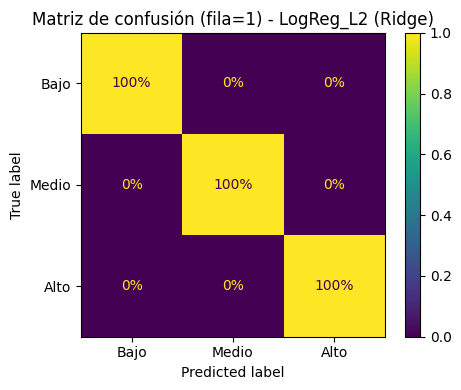


=== LogReg_L1 (Lasso) | Mejores hiperparámetros ===
{'clf__C': 1.0}

Reporte de clasificación (TEST):
              precision    recall  f1-score   support

        Bajo       1.00      1.00      1.00         2
       Medio       1.00      0.50      0.67         2
        Alto       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.78         5
weighted avg       0.90      0.80      0.80         5



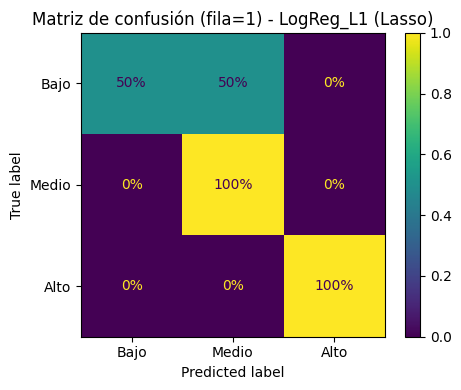


=== LogReg_ElasticNet | Mejores hiperparámetros ===
{'clf__C': 10.0, 'clf__l1_ratio': 0.2}

Reporte de clasificación (TEST):
              precision    recall  f1-score   support

        Bajo       0.67      1.00      0.80         2
       Medio       1.00      1.00      1.00         2
        Alto       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5



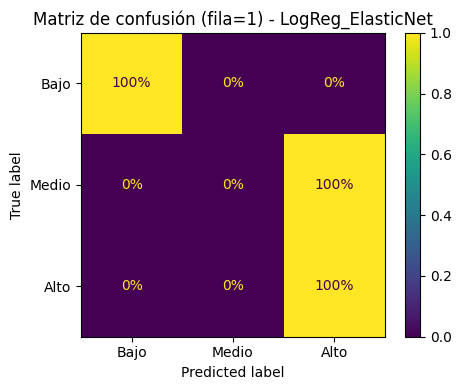


=== Comparación regularización (CV y TEST) ===
           Modelo  CV_best_f1_macro  Test_Accuracy  Test_Precision_macro  Test_Recall_macro  Test_F1_macro  Test_ROC_AUC_OVR_macro  Test_PR_AUC_macro
LogReg_L2 (Ridge)            0.5000            1.0                1.0000             1.0000         1.0000                  0.9167             0.8333
LogReg_L1 (Lasso)            0.4852            0.8                0.8333             0.8333         0.7778                  0.9167             0.8333
LogReg_ElasticNet            0.5000            0.8                0.5556             0.6667         0.6000                  0.9167             0.8333


In [ ]:
# ======================================================
# 4.1 OPTIMIZACION - REGULARIZACION
# ======================================================

RANDOM_STATE = 42
TEST_SIZE = 0.20
CV_FOLDS = 3
SCORING = "f1_macro"

y = df["Impacto"]
X = df[["País", "Temperatura_promedio", "Cambio_lluvias", "Frecuencia_sequías"]]

# Orden explícito de clases para alinear probabilidades/AUC
class_names = ["Bajo", "Medio", "Alto"]

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# ---------- Preprocesamiento ----------
cat_cols = ["País"]
num_cols = ["Temperatura_promedio", "Cambio_lluvias", "Frecuencia_sequías"]

pre_scaled = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", Pipeline([("scaler", StandardScaler())]), num_cols)
])

# ---------- GridSearch por tipo de penalización ----------
def run_grid(penalty: str, grid_extra: dict):
    pipe = Pipeline([
        ("prep", pre_scaled),
        ("clf", LogisticRegression(
            penalty=penalty,
            solver="saga",            # soporta L1/L2/ElasticNet
            multi_class="auto",
            max_iter=5000,
            random_state=RANDOM_STATE
        ))
    ])
    grid = {"clf__C": [0.01, 0.1, 1.0, 10.0]}  # fuerza de regularización (C bajo = más regularización)
    grid.update(grid_extra)

    cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        scoring=SCORING,
        refit=True,
        cv=cv,
        n_jobs=-1,
        return_train_score=True
    )
    gs.fit(X_train, y_train)
    return gs

# ---------- Ejecutar grids ----------
gs_l2 = run_grid("l2", {})
gs_l1 = run_grid("l1", {})
gs_en = run_grid("elasticnet", {"clf__l1_ratio": [0.2, 0.5, 0.8]})

# ---------- Helper: evaluación en test ----------
def evaluate_best(name: str, gs) -> dict:
    best = gs.best_estimator_
    y_pred = best.predict(X_test)

    # Probabilidades alineadas al orden class_names (para AUC)
    y_proba = best.predict_proba(X_test)  # (n_samples, n_classes)
    classes_est = best.named_steps["clf"].classes_  # orden interno del estimador
    proba_aligned = np.zeros_like(y_proba)
    for idx, cls in enumerate(classes_est):
        j = class_names.index(cls)
        proba_aligned[:, j] = y_proba[:, idx]
    y_test_bin = label_binarize(y_test, classes=class_names)

    # Métricas de test
    acc = accuracy_score(y_test, y_pred)
    prec_macro = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec_macro = recall_score(y_test, y_pred, average="macro", zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average="macro", zero_division=0)

    try:
        auc_roc = roc_auc_score(y_test_bin, proba_aligned, average="macro", multi_class="ovr")
    except Exception:
        auc_roc = None
    try:
        ap_macro = average_precision_score(y_test_bin, proba_aligned, average="macro")
    except Exception:
        ap_macro = None

    # Reporte por clase
    print(f"\n=== {name} | Mejores hiperparámetros ===")
    print(gs.best_params_)
    print("\nReporte de clasificación (TEST):")
    print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

    # Matriz de confusión (normalizada por fila = recall por clase)
    cm = confusion_matrix(y_test, y_pred, labels=class_names, normalize="true")
    fig, ax = plt.subplots(figsize=(5,4))
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot(ax=ax, values_format=".0%")
    ax.set_title(f"Matriz de confusión (fila=1) - {name}")
    fig.tight_layout()
    plt.show()

    return {
        "Modelo": name,
        "CV_best_f1_macro": round(gs.best_score_, 4),
        "Test_Accuracy": round(acc, 4),
        "Test_Precision_macro": round(prec_macro, 4),
        "Test_Recall_macro": round(rec_macro, 4),
        "Test_F1_macro": round(f1_macro, 4),
        "Test_ROC_AUC_OVR_macro": None if auc_roc is None else round(auc_roc, 4),
        "Test_PR_AUC_macro": None if ap_macro is None else round(ap_macro, 4),
    }

# ---------- Evaluación ----------
rows = []
rows.append(evaluate_best("LogReg_L2 (Ridge)", gs_l2))
rows.append(evaluate_best("LogReg_L1 (Lasso)", gs_l1))
rows.append(evaluate_best("LogReg_ElasticNet", gs_en))

summary = pd.DataFrame(rows)
print("\n=== Comparación regularización (CV y TEST) ===")
print(summary.to_string(index=False))




# **Conclusiones**

Del Análisis se concluye que el modelo con mejor desempeño observado es SVM, ya que tiene el mejor valor de accuracy en test,
hiperparámetro regularizado (mejor generalización)
y es un modelo simple y estable para tan pocos datos.

Se observa que los países con alto riesgo en la producción tienen relación fundamentalmente con la falta de lluvias y la frecuencia de sequías.
La recomendación por lo tanto, dado que es un factor climático inmanejable, es adaptar la producción a estas condiciones climáticas. Esto es, inversión en optimización en tecnologías de riego y protección de humedad, que garanticen el buen uso del agua. Utilizacion de semillas resistentes a condiciones de sequedad y diversificación de cultivos.  
